<a href="https://colab.research.google.com/github/cantaruttim/Diabetes/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import PredictionError

In [2]:
dataset = pd.read_csv('diabetes.rwrite1.csv', encoding= "utf_8", delimiter=" ")
dataset

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220


In [36]:
dataset.describe()

# temos uma variância relativamente alta para a coluna y

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,y
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.637111e-16,1.309912e-16,-8.015207e-16,1.322472e-16,-8.590413e-17,1.321216e-16,-4.558947e-16,3.923458e-16,-3.845592e-16,-3.385929e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


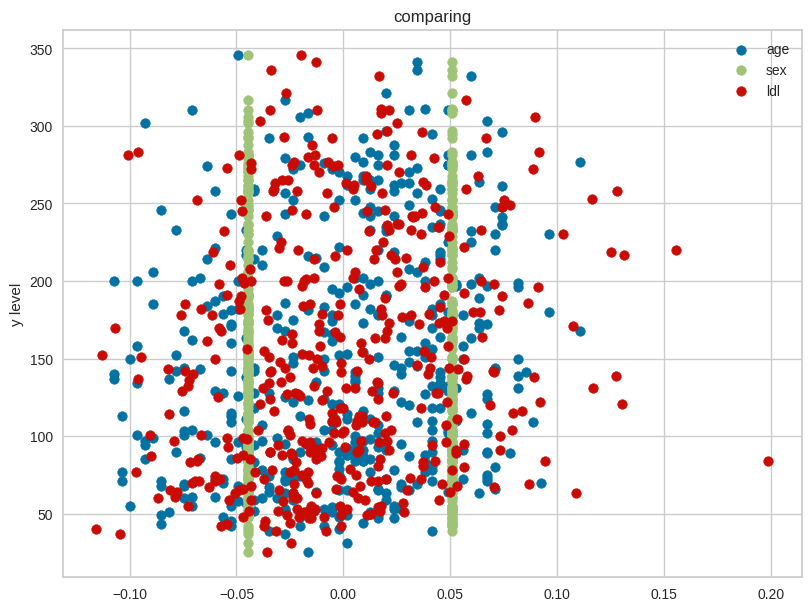

In [48]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6), layout='constrained')

ax.scatter(dataset['age'], dataset['y'], label='age')  
ax.scatter(dataset['sex'], dataset['y'], label='sex')  
ax.scatter(dataset['ldl'], dataset['y'], label='ldl') 

ax.set_ylabel('y level')  # Add a y-label to the axes.
ax.set_title("comparing")  # Add a title to the axes.
ax.legend();  # Add a legend.

In [49]:
dataset.columns

Index(['age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu',
       'y'],
      dtype='object')

In [52]:
from sklearn.decomposition import PCA

X = dataset.iloc[:, 0:10].values

pca = PCA(n_components=2)
# pca.fit(X)
features = ['age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']
x = dataset.loc[:, features].values
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

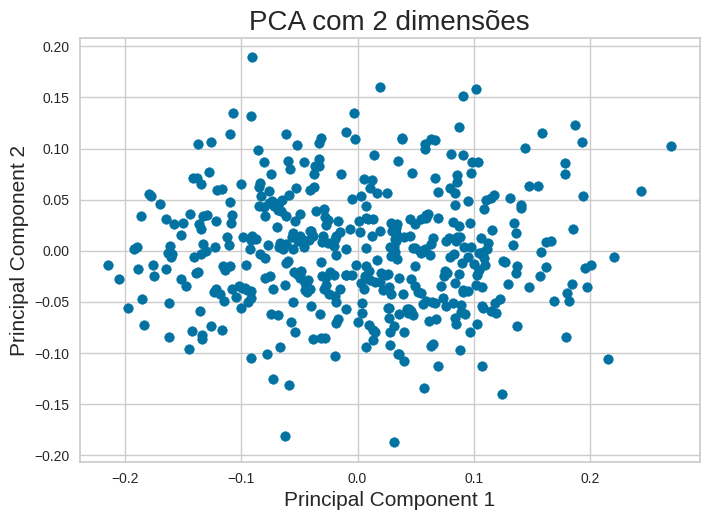

In [58]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA com 2 dimensões', fontsize = 20)
ax.scatter(principalDf['principal component 1'], principalDf['principal component 2']);

In [63]:
!!pip install sklearn-som

['Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/',
 'Collecting sklearn-som',
 '  Downloading sklearn_som-1.1.0-py3-none-any.whl (6.7 kB)',
 'Requirement already satisfied: numpy in /usr/local/lib/python3.10/dist-packages (from sklearn-som) (1.22.4)',
 'Installing collected packages: sklearn-som',
 'Successfully installed sklearn-som-1.1.0']

In [64]:
df2 = dataset[['age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']]
df2 = dataset.to_numpy()


from sklearn import datasets
from sklearn_som.som import SOM

# Crio uma SOM com 5x1 neurônios (5 clusters)
som = SOM(m=3, n=1, dim=len(df2[0]), random_state=1234)

# Busca de agrupamentoslife_expec
som.fit(df2)

# Associo cada país com o grupo respectivo
predictions = som.predict(df2)

df3 = dataset
df3['cluster'] = predictions

pca = PCA(n_components=2)
features = ['age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']
x = dataset.loc[:, features].values
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


finalDf = pd.concat([principalDf, df3[['cluster']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,cluster
0,0.027931,-0.092601,1
1,-0.134686,0.065263,2
2,0.012945,-0.077764,1
3,0.002345,0.018182,0
4,-0.035981,0.038621,1


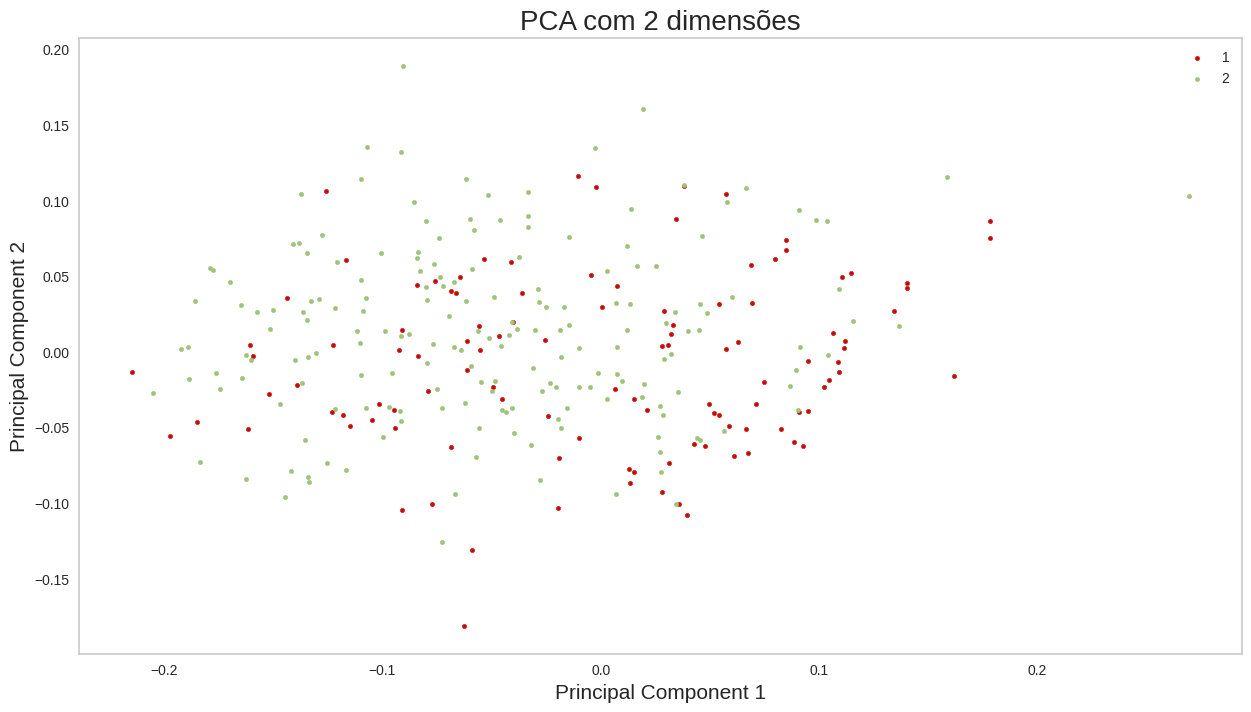

In [67]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA com 2 dimensões', fontsize = 20)
targets = [1,2]
colors = ['r', 'g']
for target, color in zip(targets,colors):
  indicesToKeep = finalDf['cluster'] == target
  ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
  , finalDf.loc[indicesToKeep, 'principal component 2']
  , c = color
  , s = 10)
ax.legend(targets)
ax.grid()

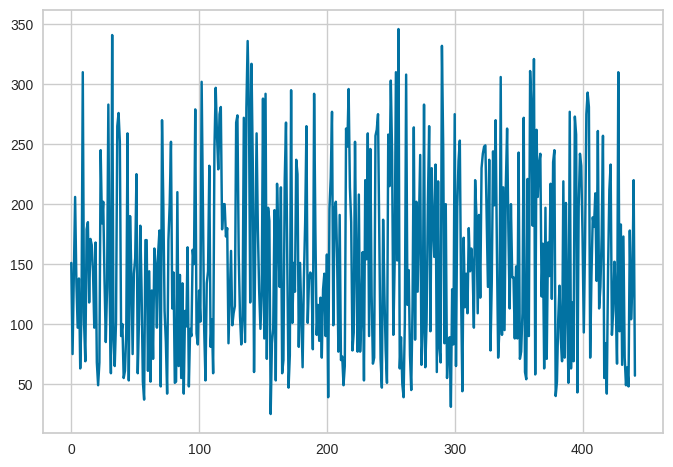

In [38]:
dataset['y'].plot();

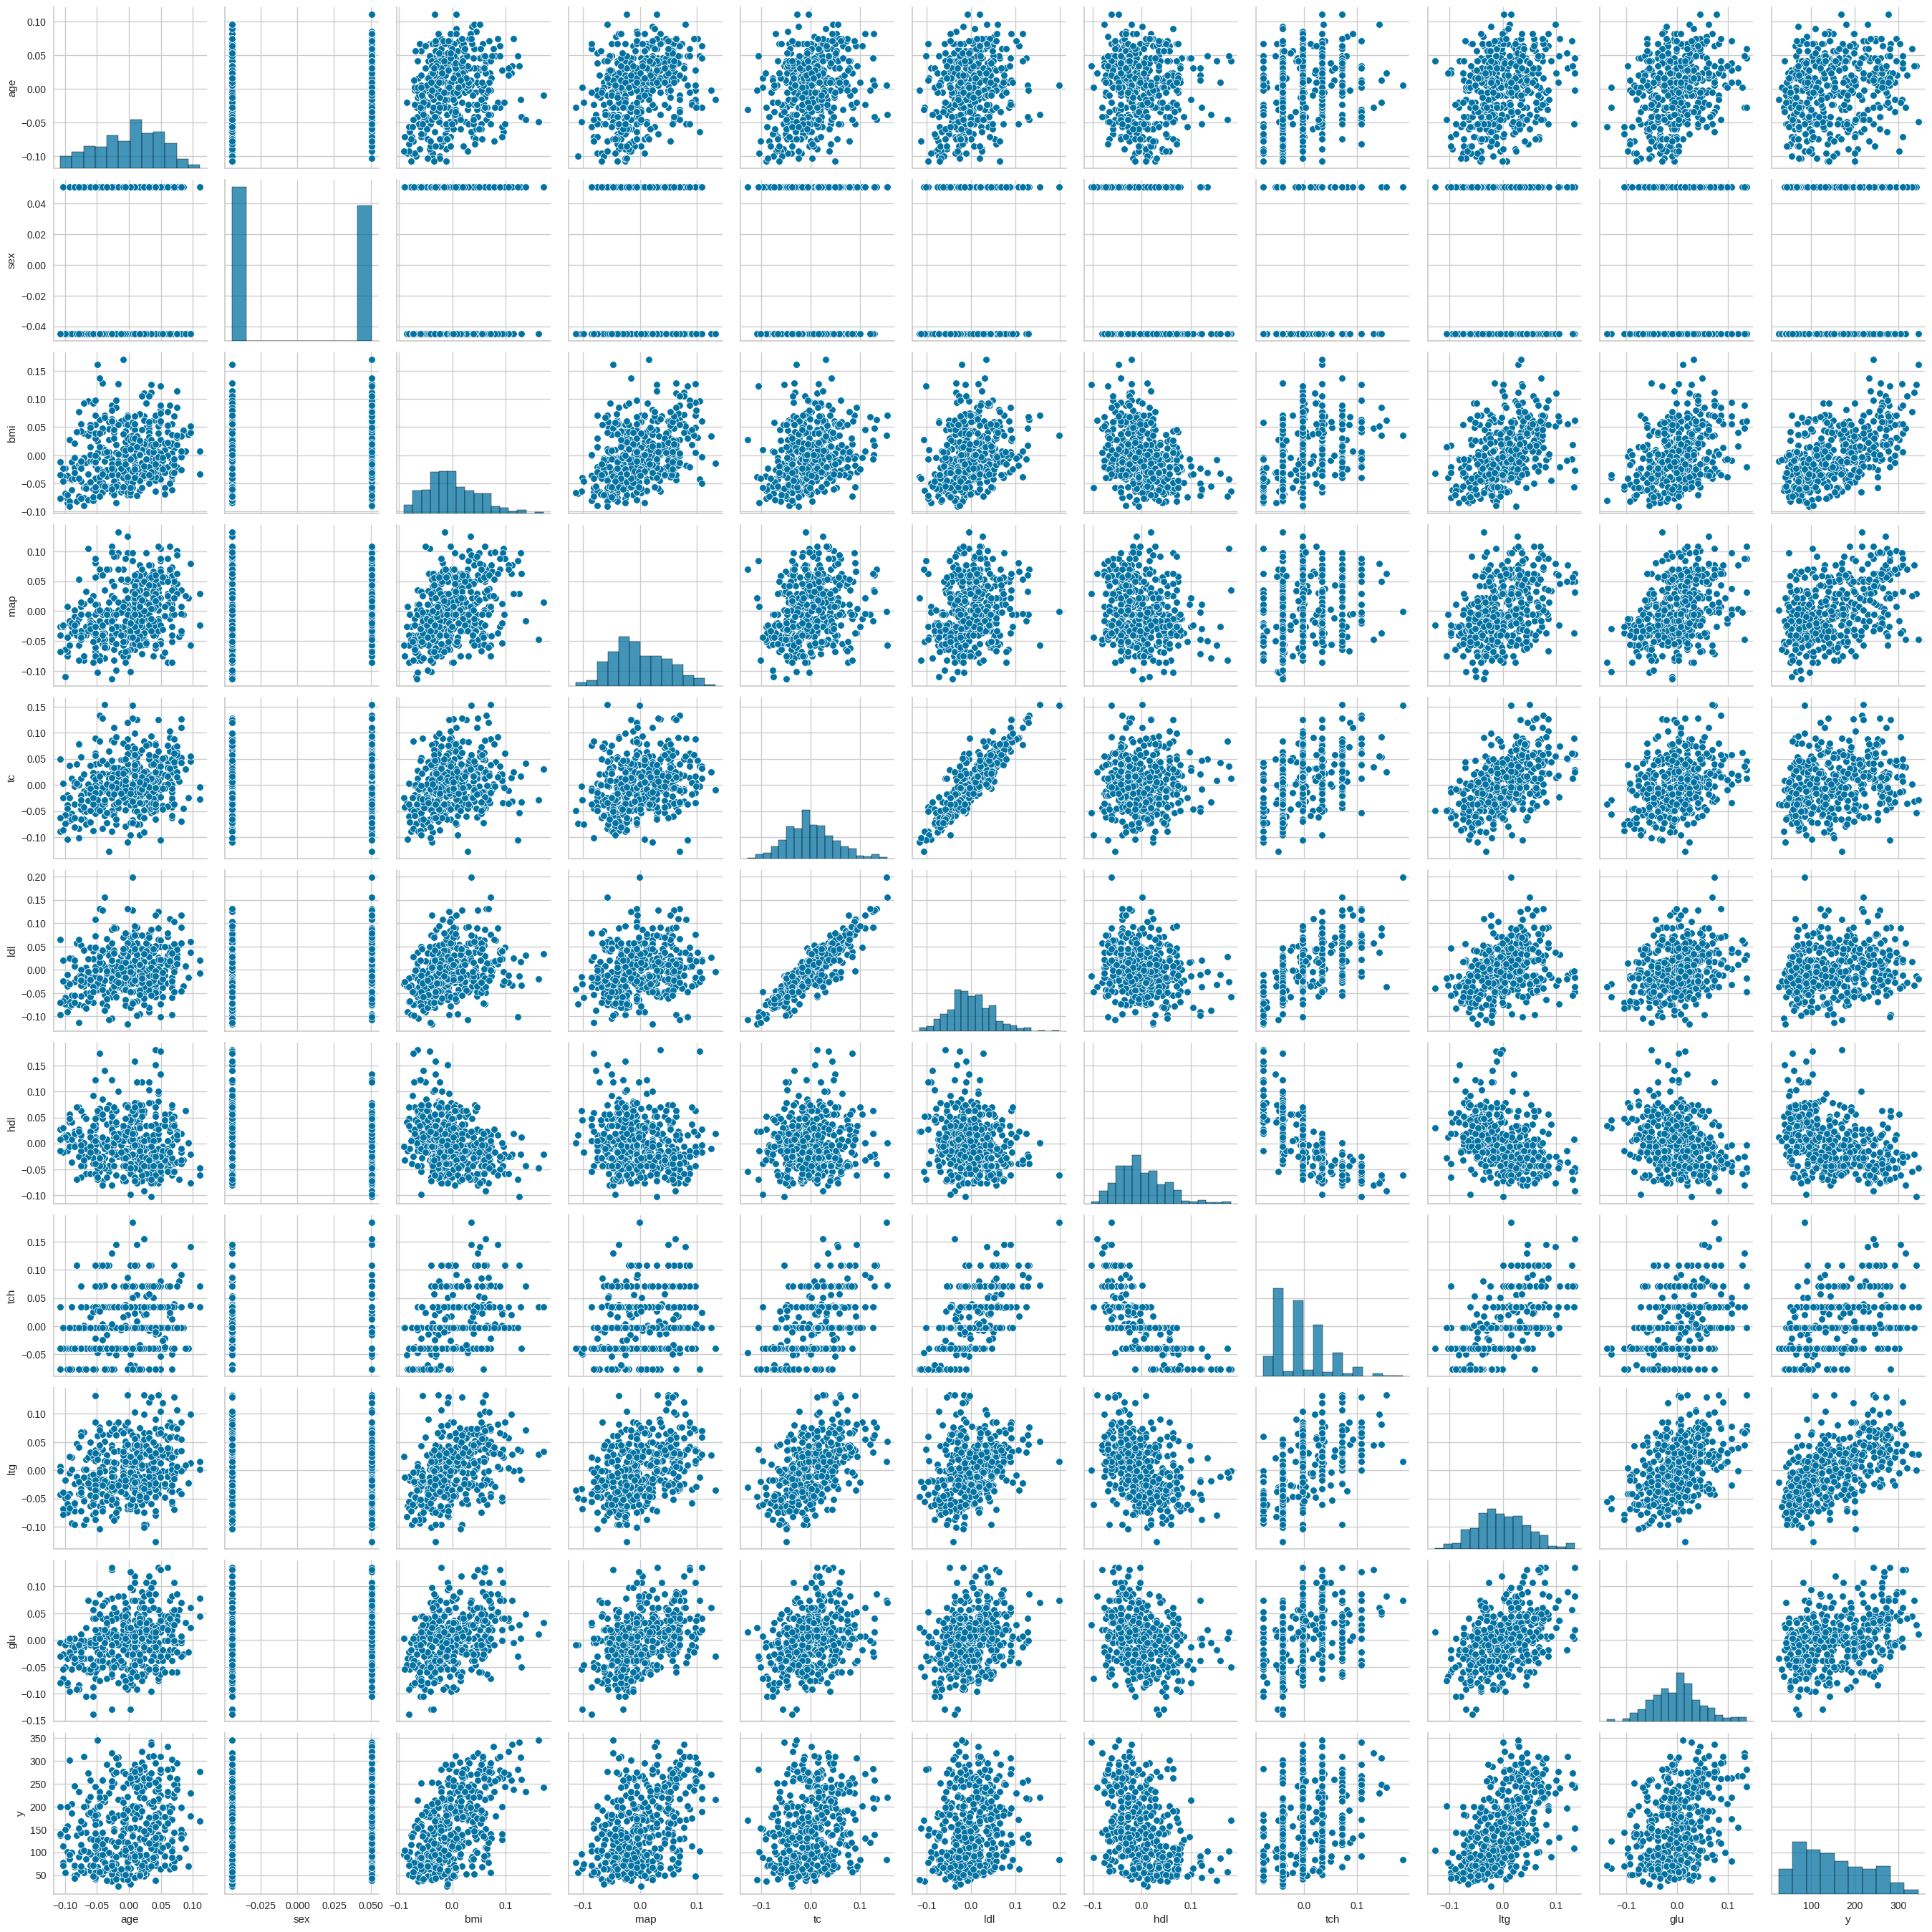

In [41]:
sns.pairplot(dataset);

In [3]:
X = dataset.iloc[:, 0:10].values
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [4]:
y = dataset.iloc[:, 10].values
y

array([151,  75, 141, 206, 135,  97, 138,  63, 110, 310, 101,  69, 179,
       185, 118, 171, 166, 144,  97, 168,  68,  49,  68, 245, 184, 202,
       137,  85, 131, 283, 129,  59, 341,  87,  65, 102, 265, 276, 252,
        90, 100,  55,  61,  92, 259,  53, 190, 142,  75, 142, 155, 225,
        59, 104, 182, 128,  52,  37, 170, 170,  61, 144,  52, 128,  71,
       163, 150,  97, 160, 178,  48, 270, 202, 111,  85,  42, 170, 200,
       252, 113, 143,  51,  52, 210,  65, 141,  55, 134,  42, 111,  98,
       164,  48,  96,  90, 162, 150, 279,  92,  83, 128, 102, 302, 198,
        95,  53, 134, 144, 232,  81, 104,  59, 246, 297, 258, 229, 275,
       281, 179, 200, 200, 173, 180,  84, 121, 161,  99, 109, 115, 268,
       274, 158, 107,  83, 103, 272,  85, 280, 336, 281, 118, 317, 235,
        60, 174, 259, 178, 128,  96, 126, 288,  88, 292,  71, 197, 186,
        25,  84,  96, 195,  53, 217, 172, 131, 214,  59,  70, 220, 268,
       152,  47,  74, 295, 101, 151, 127, 237, 225,  81, 151, 10

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(n_jobs = 30).fit(X_train, y_train)
reg

LinearRegression(n_jobs=30)

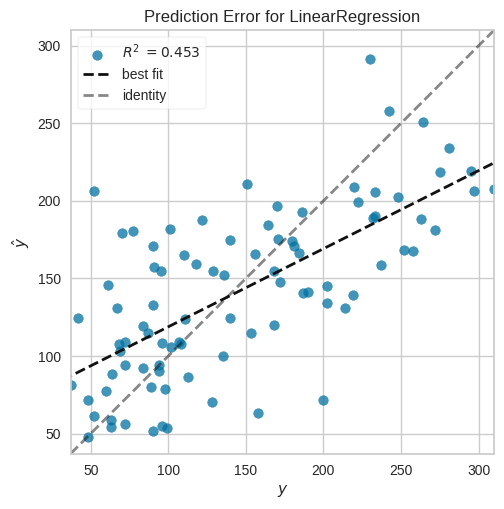

In [35]:
# Instantiate the linear model and visualizer
model = LinearRegression(n_jobs = 60)
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()         ;

In [7]:
previsoes = reg.predict(X_test)
previsoes

array([138.47032272, 181.10311796, 125.34650402, 292.75409394,
       123.88080069,  91.89920521, 257.26623571, 177.76309357,
        84.98399508, 109.15734248,  94.4860807 , 166.13170425,
        57.40863723, 206.13846128,  97.78386268, 131.0064874 ,
       214.29968996, 252.53124994, 199.6645535 , 219.49967665,
       203.2365464 ,  88.00667238,  70.65206201, 186.92065774,
       155.81290675, 162.80795787, 191.93403891, 184.72672694,
        46.62855775, 108.26601337, 178.14954273,  91.35193917,
       127.72256442, 184.04456013, 172.23860522, 189.51563882,
       121.83424016, 117.75704799, 145.68144979,  58.57463632,
        72.55651144, 107.28029907, 166.15444516, 153.2915978 ,
       165.18988007,  62.95728971,  73.59139539, 110.05312255,
        54.49528123, 164.89115961, 152.49647694,  63.8896717 ,
       111.43581765, 108.34693634, 179.9672652 , 158.69983432,
        95.04606308, 209.69032262, 118.37314403,  69.69981244,
       189.04947787, 204.99342248, 140.26696914, 105.75

In [8]:
reg.score(X_test, y_test) # , reg.coef_, reg.intercept_

0.47729201741573324

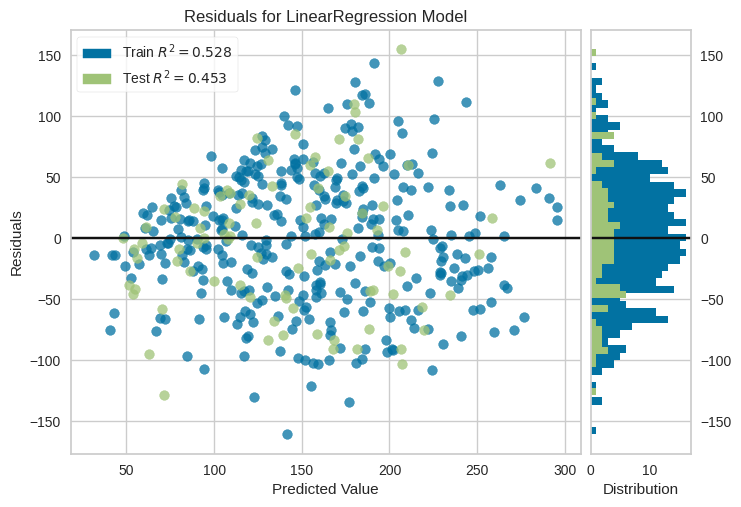

In [9]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot


"""
O gráfico de resíduos mostra a diferença entre os resíduos no 
eixo vertical e a variável dependente no eixo horizontal, 
permitindo detectar regiões dentro do alvo que podem ser 
susceptíveis a mais ou menos erros

Objetivo: 

  -  analisar a variância do erro do regressor.

"""

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();    

In [10]:
previsoes = model.predict(X_test)
previsoes

array([139.5483133 , 179.52030578, 134.04133298, 291.41193598,
       123.78723656,  92.17357677, 258.23409704, 181.33895238,
        90.22217862, 108.63143298,  94.13938654, 168.43379636,
        53.50669663, 206.63040068, 100.13238561, 130.66881649,
       219.53270758, 250.78291772, 196.36682356, 218.57497401,
       207.35002447,  88.48361667,  70.43428801, 188.95725301,
       154.88720039, 159.35957695, 188.31587948, 180.38835506,
        47.98988446, 108.97514644, 174.78080029,  86.36598906,
       132.95890535, 184.5410226 , 173.83298051, 190.35863287,
       124.41740796, 119.65426903, 147.95402494,  59.05311211,
        71.62636914, 107.68722902, 165.45544477, 155.00784964,
       171.04558668,  61.45763075,  71.66975626, 114.96330486,
        51.57808027, 167.57781958, 152.52505798,  62.95827693,
       103.49862017, 109.20495627, 175.63844013, 154.60247734,
        94.41476124, 210.74244148, 120.25601864,  77.61590087,
       187.93503183, 206.49543321, 140.63018684, 105.59

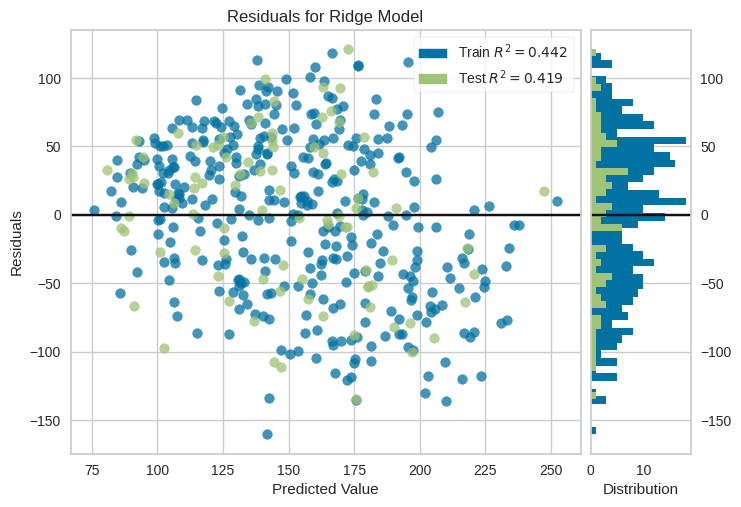

In [11]:
# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();   

In [12]:
previsoes_Ridge = model.predict(X_test)
previsoes_Ridge

array([157.28552724, 163.00881063, 155.1808409 , 247.34572515,
       143.86539626, 126.29597049, 218.14744355, 190.20793835,
       113.85148733, 134.55894262, 117.02128379, 144.48525984,
        87.28861607, 197.14084556, 125.51000069, 138.51573422,
       205.36031869, 220.7380849 , 169.06119149, 196.32673285,
       175.59380829, 114.95364873, 101.19472233, 180.24036634,
       146.93490606, 162.96904085, 174.96220933, 169.48155706,
        80.9993115 , 138.96451765, 170.06612054, 113.58185921,
       143.88961607, 176.39214929, 171.50678172, 180.29782974,
       141.03735278, 143.6071404 , 165.05395559,  90.61240049,
       108.11630033, 129.7377614 , 153.90107041, 164.58713704,
       166.08911167,  94.58796931, 102.54433262, 114.4536641 ,
        89.45732402, 147.17764005, 139.75865177,  91.12486234,
       135.90128573, 123.02786429, 175.74503462, 144.21775963,
       121.37659507, 181.99630492, 123.14703371,  90.51979689,
       178.64887636, 172.75021382, 140.23918465, 131.67

In [ ]:
"""
O histograma pode ser substituído por um gráfico Q-Q, 
que é uma maneira comum de verificar se os resíduos são normalmente distribuídos. 
Se os resíduos são normalmente distribuídos, então seus quantis quando plotados
contra quantis de distribuição normal devem formar uma linha reta

"""

'\nO histograma pode ser substituído por um gráfico Q-Q, \nque é uma maneira comum de verificar se os resíduos são normalmente distribuídos. \nSe os resíduos são normalmente distribuídos, então seus quantis quando plotados\ncontra quantis de distribuição normal devem formar uma linha reta\n\n'

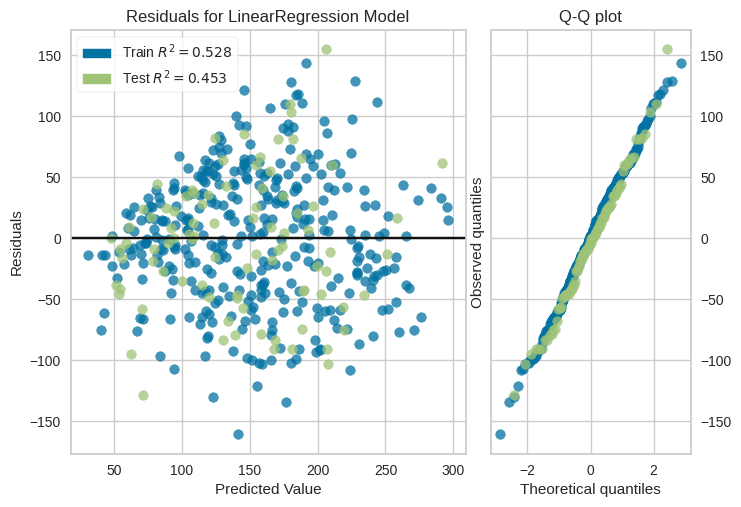

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [13]:
visualizer = ResidualsPlot(LinearRegression(), hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

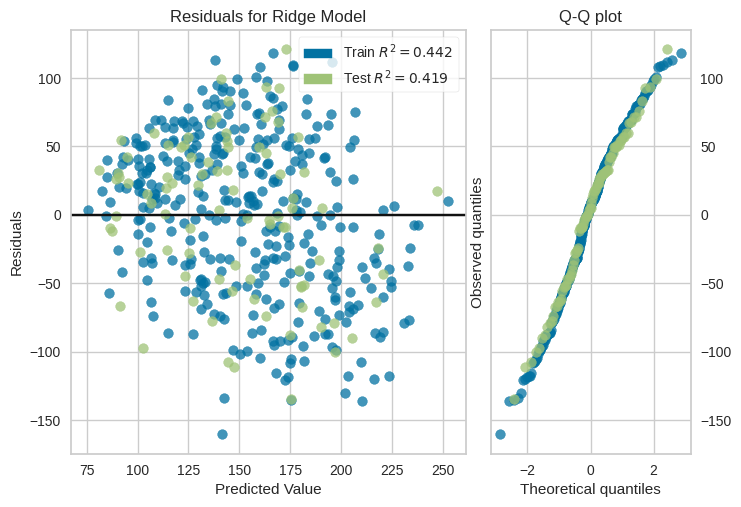

In [14]:
visualizer = ResidualsPlot(Ridge(), hist=False,  qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

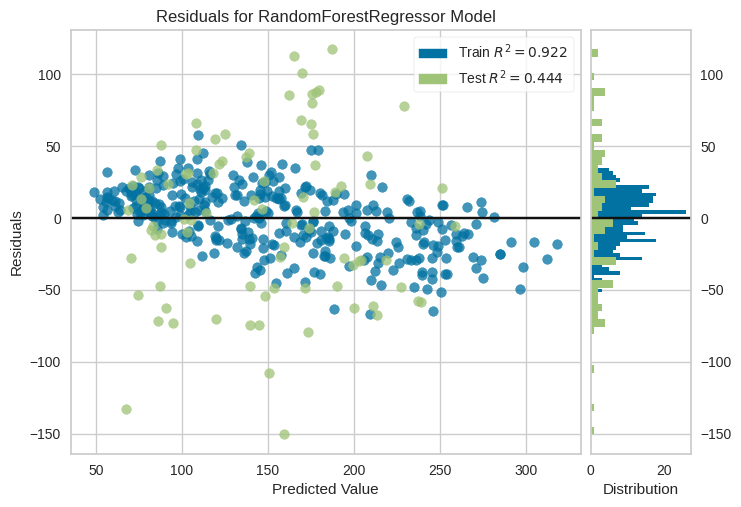

In [15]:
## Vamos testar utilizando um Ensemble Method

from sklearn.ensemble import RandomForestRegressor
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(RandomForestRegressor(n_estimators=200), X_train, y_train, X_test, y_test)

In [16]:
model = RandomForestRegressor(n_estimators=600)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.43437634167733796

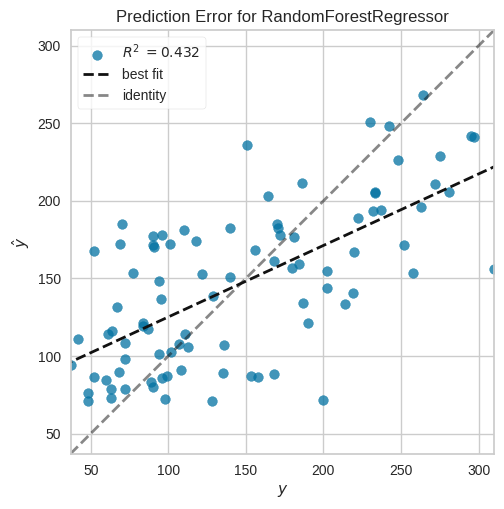

In [31]:
# Instantiate the linear model and visualizer
model = RandomForestRegressor(n_estimators=600)
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()         ;

In [17]:
previsoes_RandomForest = model.predict(X_test)
previsoes_RandomForest

array([141.98666667, 179.40333333, 152.41333333, 251.615     ,
       112.04833333, 127.41      , 244.19166667, 211.825     ,
       145.69166667, 174.88333333, 102.83333333, 171.71166667,
        88.165     , 240.70833333,  89.99      , 123.01166667,
       238.295     , 266.93666667, 180.60333333, 232.26333333,
       156.07833333, 116.845     ,  71.32833333, 195.13333333,
       137.96333333, 177.93      , 194.30666667, 153.58166667,
        70.59166667, 106.18666667, 184.03333333, 102.26666667,
       174.97      , 206.39666667, 156.30166667, 205.22333333,
       107.80333333, 116.22666667, 178.70166667,  76.79166667,
        76.69333333,  89.635     , 167.89166667, 162.57166667,
       175.12333333,  86.99333333,  68.70166667, 114.355     ,
        80.935     , 153.675     , 105.69333333,  86.08833333,
       172.90666667, 106.02666667, 181.79666667, 134.09833333,
       101.06166667, 231.805     ,  90.95666667,  83.715     ,
       153.94      , 164.74      , 130.365     ,  97.28

### Erros

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
mean_squared_error(y_test, previsoes, squared=False)
# mean_squared_error(y_test, previsoes, squared=True)

53.8532569849144

In [20]:
mean_squared_error(y_test, previsoes_Ridge, squared=False)
# mean_squared_error(y_test, previsoes_Ridge, squared=True)

55.47444707448727

In [21]:
mean_squared_error(y_test, previsoes_RandomForest, squared=False)
# mean_squared_error(y_test, previsoes_RandomForest, squared=True)

54.742670507973656

In [22]:
from sklearn import linear_model

BayesianRidge_reg = linear_model.BayesianRidge()
BayesianRidge_reg = reg.fit(X_train, y_train)

In [23]:
previsoesBayesianR = reg.predict(X_test)
previsoesBayesianR

array([139.5483133 , 179.52030578, 134.04133298, 291.41193598,
       123.78723656,  92.17357677, 258.23409704, 181.33895238,
        90.22217862, 108.63143298,  94.13938654, 168.43379636,
        53.50669663, 206.63040068, 100.13238561, 130.66881649,
       219.53270758, 250.78291772, 196.36682356, 218.57497401,
       207.35002447,  88.48361667,  70.43428801, 188.95725301,
       154.88720039, 159.35957695, 188.31587948, 180.38835506,
        47.98988446, 108.97514644, 174.78080029,  86.36598906,
       132.95890535, 184.5410226 , 173.83298051, 190.35863287,
       124.41740796, 119.65426903, 147.95402494,  59.05311211,
        71.62636914, 107.68722902, 165.45544477, 155.00784964,
       171.04558668,  61.45763075,  71.66975626, 114.96330486,
        51.57808027, 167.57781958, 152.52505798,  62.95827693,
       103.49862017, 109.20495627, 175.63844013, 154.60247734,
        94.41476124, 210.74244148, 120.25601864,  77.61590087,
       187.93503183, 206.49543321, 140.63018684, 105.59

In [24]:
BayesianRidge_reg.score(X_test, y_test) # , reg.coef_, reg.intercept_

0.45260660216173787

In [25]:
mean_squared_error(y_test, previsoesBayesianR, squared=False)

53.8532569849144

In [29]:
## VAMOS ENTENDER O PREDICTION ERROR PLOT

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import PredictionError

In [ ]:
"""
A prediction error plot shows the actual targets from the 
dataset against the predicted values generated by our model. 
This allows us to see how much variance is in the model. 
Data scientists can diagnose regression 
models using this plot by comparing against the 45 degree line, 
where the prediction exactly matches the model.
"""

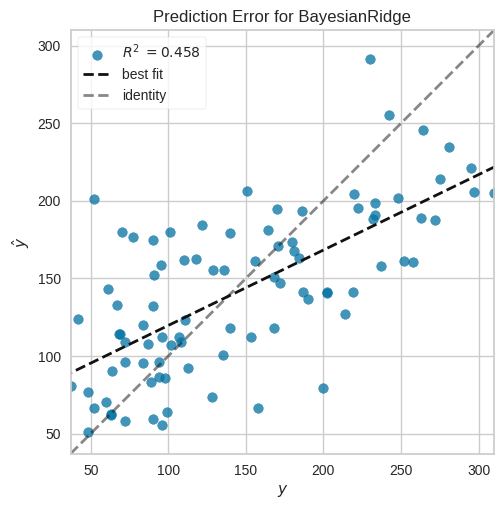

In [28]:
# Instantiate the linear model and visualizer
model = linear_model.BayesianRidge()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()         ;